<a href="https://colab.research.google.com/github/munhyunsik/Yolo-traning-Colab/blob/main/yolo_tranning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. GPU 연결 확인
import torch
print("CUDA 사용 가능 여부:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("사용 중인 GPU:", torch.cuda.get_device_name(0))
else:
    print("⚠️ GPU가 연결되어 있지 않습니다. '런타임 > 런타임 유형 변경'에서 GPU를 선택하세요.")

# 2. 이전에 설치된 CPU 버전 제거
!pip uninstall -y torch torchvision torchaudio ultralytics

# 3. GPU 버전 PyTorch 설치 (Colab 기본은 CUDA 11.8)
!pip install torch torchvision torchaudio

# 4. YOLOv8 (Ultralytics) 설치
!pip install ultralytics

# 5. 설치 확인 (YOLO 클래스가 아닌 ultralytics 모듈에서 버전 확인)
import ultralytics
print("Ultralytics 버전 확인:", ultralytics.__version__)



CUDA 사용 가능 여부: True
사용 중인 GPU: Tesla T4
Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.21.0
Uninstalling torchvision-0.21.0:
  Successfully uninstalled torchvision-0.21.0
Found existing installation: torchaudio 2.6.0
Uninstalling torchaudio-2.6.0:
  Successfully uninstalled torchaudio-2.6.0
Found existing installation: ultralytics 8.3.102
Uninstalling ultralytics-8.3.102:
  Successfully uninstalled ultralytics-8.3.102
  Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (28 kB)
  Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl.metadata (6.6 kB)
Using cached torch-2.6.0-cp311-cp311-manylinux1_x86_64.whl (766.7 MB)
Using cached torchvision-0.21.0-cp311-cp311-manylinux1_x86_64.whl (7.2 MB)
Using cached torchaudio-2.6.0-cp311-cp311-manylinux1_x86_64.whl (3.4 MB)


  Using cached ultralytics-8.3.102-py3-none-any.whl.metadata (37 kB)
Using cached ultralytics-8.3.102-py3-none-any.whl (993 kB)
Ultralytics 버전 확인: 8.3.102


In [ ]:
# 1. Ultralytics 라이브러리 설치 CPU사용
!pip install ultralytics
!pip uninstall -y torch torchvision torchaudio ultralytics
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install ultralytics



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 664.8/664.8 MB 136.7 MB/s eta 0:00:01

In [ ]:
import os

# 데이터셋 루트 폴더
dataset_path = "dataset"

# 필요한 폴더 목록
folders = [
    "images/train", "images/val", "images/test",
    "labels/train", "labels/val", "labels/test"
]

# 폴더 생성
for folder in folders:
    os.makedirs(os.path.join(dataset_path, folder), exist_ok=True)

print("✅ YOLO 데이터셋 폴더가 생성되었습니다.")


✅ YOLO 데이터셋 폴더가 생성되었습니다.


In [ ]:
from google.colab import files
import os

# train 폴더 경로
train_folder = "/content/dataset/images/train"

# train 폴더가 없으면 생성
os.makedirs(train_folder, exist_ok=True)

# 파일 업로드
print("📂 C드라이브에서 Train 이미지 파일을 선택하세요.")
uploaded_train_files = files.upload()

# 업로드된 파일을 train 폴더로 저장
for file_name in uploaded_train_files.keys():
    with open(os.path.join(train_folder, file_name), "wb") as f:
        f.write(uploaded_train_files[file_name])

print(f"✅ {len(uploaded_train_files)}개의 이미지가 Train 폴더에 업로드되었습니다.")



📂 C드라이브에서 Train 이미지 파일을 선택하세요.


Saving A1.jpg to A1.jpg
Saving A2.jpg to A2.jpg
Saving A3.jpg to A3.jpg
Saving A4.jpg to A4.jpg
Saving A5.jpg to A5.jpg
Saving A6.jpg to A6.jpg
Saving A7.jpg to A7.jpg
Saving A8.jpg to A8.jpg
Saving A9.jpg to A9.jpg
Saving A10.jpg to A10.jpg
Saving A11.jpg to A11.jpg
Saving A12.jpg to A12.jpg
Saving A13.jpg to A13.jpg
Saving A14.jpg to A14.jpg
Saving A15.jpg to A15.jpg
Saving A16.jpg to A16.jpg
Saving A17.jpg to A17.jpg
Saving A18.jpg to A18.jpg
Saving A19.jpg to A19.jpg
Saving A20.jpg to A20.jpg
Saving A21.jpg to A21.jpg
Saving A22.jpg to A22.jpg
Saving A23.jpg to A23.jpg
Saving A24.jpg to A24.jpg
Saving A25.jpg to A25.jpg
Saving A26.jpg to A26.jpg
Saving A27.jpg to A27.jpg
Saving A28.jpg to A28.jpg
Saving A29.jpg to A29.jpg
Saving A30.jpg to A30.jpg
Saving A31.jpg to A31.jpg
Saving A32.jpg to A32.jpg
Saving A33.jpg to A33.jpg
Saving A34.jpg to A34.jpg
Saving A35.jpg to A35.jpg
Saving A36.jpg to A36.jpg
Saving A37.jpg to A37.jpg
Saving A38.jpg to A38.jpg
Saving A39.jpg to A39.jpg
Savi

In [ ]:
from google.colab import files
import os

# test 폴더 경로
test_folder = "/content/dataset/images/test"

# test 폴더가 없으면 생성
os.makedirs(test_folder, exist_ok=True)

# 파일 업로드
print("📂 C드라이브에서 Test 이미지 파일을 선택하세요.")
uploaded_test_files = files.upload()

# 업로드된 파일을 test 폴더로 저장
for file_name in uploaded_test_files.keys():
    with open(os.path.join(test_folder, file_name), "wb") as f:
        f.write(uploaded_test_files[file_name])

print(f"✅ {len(uploaded_test_files)}개의 이미지가 Test 폴더에 업로드되었습니다.")


📂 C드라이브에서 Test 이미지 파일을 선택하세요.


Saving A51.jpg to A51.jpg
Saving A52.jpg to A52.jpg
Saving A53.jpg to A53.jpg
Saving A54.jpg to A54.jpg
Saving A55.jpg to A55.jpg
Saving A56.jpg to A56.jpg
Saving A57.jpg to A57.jpg
Saving A58.jpg to A58.jpg
Saving A59.jpg to A59.jpg
Saving A60.jpg to A60.jpg
Saving A61.jpg to A61.jpg
Saving b057.jpg to b057.jpg
Saving b058.jpg to b058.jpg
Saving b059.jpg to b059.jpg
Saving b060.jpg to b060.jpg
Saving b061.jpg to b061.jpg
Saving b062.jpg to b062.jpg
Saving b063.jpg to b063.jpg
Saving C067.jpg to C067.jpg
Saving C068.jpg to C068.jpg
Saving C069.jpg to C069.jpg
Saving C070.jpg to C070.jpg
Saving C071.jpg to C071.jpg
Saving C072.jpg to C072.jpg
Saving C073.jpg to C073.jpg
Saving C074.jpg to C074.jpg
Saving C075.jpg to C075.jpg
Saving C076.jpg to C076.jpg
✅ 28개의 이미지가 Test 폴더에 업로드되었습니다.


In [ ]:
from google.colab import files
import os

# val 폴더 경로
val_folder = "/content/dataset/images/val"

# val 폴더가 없으면 생성
os.makedirs(val_folder, exist_ok=True)

# 파일 업로드
print("📂 C드라이브에서 Validation 이미지 파일을 선택하세요.")
uploaded_val_files = files.upload()

# 업로드된 파일을 val 폴더로 저장
for file_name in uploaded_val_files.keys():
    with open(os.path.join(val_folder, file_name), "wb") as f:
        f.write(uploaded_val_files[file_name])

print(f"✅ {len(uploaded_val_files)}개의 이미지가 Validation 폴더에 업로드되었습니다.")



📂 C드라이브에서 Validation 이미지 파일을 선택하세요.


Saving A62.jpg to A62.jpg
Saving A63.jpg to A63.jpg
Saving A64.jpg to A64.jpg
Saving A65.jpg to A65.jpg
Saving A66.jpg to A66.jpg
Saving A67.jpg to A67.jpg
Saving A68.jpg to A68.jpg
Saving A69.jpg to A69.jpg
Saving A70.jpg to A70.jpg
Saving A71.jpg to A71.jpg
Saving b064.jpg to b064.jpg
Saving b065.jpg to b065.jpg
Saving b066.jpg to b066.jpg
Saving b067.jpg to b067.jpg
Saving b068.jpg to b068.jpg
Saving b069.jpg to b069.jpg
Saving b070.jpg to b070.jpg
Saving C077.jpg to C077.jpg
Saving C078.jpg to C078.jpg
Saving C079.jpg to C079.jpg
Saving C080.jpg to C080.jpg
Saving C081.jpg to C081.jpg
Saving C082.jpg to C082.jpg
Saving C083.jpg to C083.jpg
Saving C084.jpg to C084.jpg
Saving C085.jpg to C085.jpg
Saving C086.jpg to C086.jpg
✅ 27개의 이미지가 Validation 폴더에 업로드되었습니다.


In [ ]:
from google.colab import files

# train 폴더 경로
train_folder = "/content/dataset/labels/train"

# 파일 업로드 창 열기
print("📂 C드라이브에서 Train 데이터 파일을 선택하세요.")
uploaded_train_files = files.upload()

# 업로드된 파일을 train 폴더로 저장
for file_name in uploaded_train_files.keys():
    with open(os.path.join(train_folder, file_name), "wb") as f:
        f.write(uploaded_train_files[file_name])

print(f"✅ {len(uploaded_train_files)}개의 파일이 train 폴더에 업로드되었습니다.")


📂 C드라이브에서 Train 데이터 파일을 선택하세요.


Saving A1.txt to A1.txt
Saving A2.txt to A2.txt
Saving A3.txt to A3.txt
Saving A4.txt to A4.txt
Saving A5.txt to A5.txt
Saving A6.txt to A6.txt
Saving A7.txt to A7.txt
Saving A8.txt to A8.txt
Saving A9.txt to A9.txt
Saving A10.txt to A10.txt
Saving A11.txt to A11.txt
Saving A12.txt to A12.txt
Saving A13.txt to A13.txt
Saving A14.txt to A14.txt
Saving A15.txt to A15.txt
Saving A16.txt to A16.txt
Saving A17.txt to A17.txt
Saving A18.txt to A18.txt
Saving A19.txt to A19.txt
Saving A20.txt to A20.txt
Saving A21.txt to A21.txt
Saving A22.txt to A22.txt
Saving A23.txt to A23.txt
Saving A24.txt to A24.txt
Saving A25.txt to A25.txt
Saving A26.txt to A26.txt
Saving A27.txt to A27.txt
Saving A28.txt to A28.txt
Saving A29.txt to A29.txt
Saving A30.txt to A30.txt
Saving A31.txt to A31.txt
Saving A32.txt to A32.txt
Saving A33.txt to A33.txt
Saving A34.txt to A34.txt
Saving A35.txt to A35.txt
Saving A36.txt to A36.txt
Saving A37.txt to A37.txt
Saving A38.txt to A38.txt
Saving A39.txt to A39.txt
Savi

In [ ]:
# test 폴더 경로
test_folder = "/content/dataset/labels/test"

# 파일 업로드 창 열기
print("📂 C드라이브에서 Test 데이터 파일을 선택하세요.")
uploaded_test_files = files.upload()

# 업로드된 파일을 test 폴더로 저장
for file_name in uploaded_test_files.keys():
    with open(os.path.join(test_folder, file_name), "wb") as f:
        f.write(uploaded_test_files[file_name])

print(f"✅ {len(uploaded_test_files)}개의 파일이 test 폴더에 업로드되었습니다.")


📂 C드라이브에서 Test 데이터 파일을 선택하세요.


Saving A51.txt to A51.txt
Saving A52.txt to A52.txt
Saving A53.txt to A53.txt
Saving A54.txt to A54.txt
Saving A55.txt to A55.txt
Saving A56.txt to A56.txt
Saving A57.txt to A57.txt
Saving A58.txt to A58.txt
Saving A59.txt to A59.txt
Saving A60.txt to A60.txt
Saving A61.txt to A61.txt
Saving b057.txt to b057.txt
Saving b058.txt to b058.txt
Saving b059.txt to b059.txt
Saving b060.txt to b060.txt
Saving b061.txt to b061.txt
Saving b062.txt to b062.txt
Saving b063.txt to b063.txt
Saving C067.txt to C067.txt
Saving C068.txt to C068.txt
Saving C069.txt to C069.txt
Saving C070.txt to C070.txt
Saving C071.txt to C071.txt
Saving C072.txt to C072.txt
Saving C073.txt to C073.txt
Saving C074.txt to C074.txt
Saving C075.txt to C075.txt
Saving C076.txt to C076.txt
✅ 28개의 파일이 test 폴더에 업로드되었습니다.


In [ ]:
# val 폴더 경로
val_folder = "/content/dataset/labels/val"

# 파일 업로드 창 열기
print("📂 C드라이브에서 Validation 데이터 파일을 선택하세요.")
uploaded_val_files = files.upload()

# 업로드된 파일을 val 폴더로 저장
for file_name in uploaded_val_files.keys():
    with open(os.path.join(val_folder, file_name), "wb") as f:
        f.write(uploaded_val_files[file_name])

print(f"✅ {len(uploaded_val_files)}개의 파일이 val 폴더에 업로드되었습니다.")


📂 C드라이브에서 Validation 데이터 파일을 선택하세요.


Saving A62.txt to A62.txt
Saving A63.txt to A63.txt
Saving A64.txt to A64.txt
Saving A65.txt to A65.txt
Saving A66.txt to A66.txt
Saving A67.txt to A67.txt
Saving A68.txt to A68.txt
Saving A69.txt to A69.txt
Saving A70.txt to A70.txt
Saving A71.txt to A71.txt
Saving b064.txt to b064.txt
Saving b065.txt to b065.txt
Saving b066.txt to b066.txt
Saving b067.txt to b067.txt
Saving b068.txt to b068.txt
Saving b069.txt to b069.txt
Saving b070.txt to b070.txt
Saving C077.txt to C077.txt
Saving C078.txt to C078.txt
Saving C079.txt to C079.txt
Saving C080.txt to C080.txt
Saving C081.txt to C081.txt
Saving C082.txt to C082.txt
Saving C083.txt to C083.txt
Saving C084.txt to C084.txt
Saving C085.txt to C085.txt
Saving C086.txt to C086.txt
✅ 27개의 파일이 val 폴더에 업로드되었습니다.


In [ ]:
import yaml

# 데이터셋 YAML 파일 저장 경로
yaml_path = "/content/dataset/data.yaml"

# 데이터셋 경로 및 클래스 정보 정의
data_yaml = {
    "train": "/content/dataset/images/train",  # 학습 데이터 이미지 경로
    "val": "/content/dataset/images/val",  # 검증 데이터 이미지 경로
    "test": "/content/dataset/images/test",  # 테스트 데이터 이미지 경로 (선택 사항)
    "nc": 3,  # 클래스 개수
    "names": ["Baby", "NON Baby","Face"]  # 클래스 이름
}

# YAML 파일 생성
with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print("✅ data.yaml 파일이 생성되었습니다.")


✅ data.yaml 파일이 생성되었습니다.


In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 로드 (사전 학습된 모델 사용) GPU사용
model = YOLO("yolov8n.pt")  # "n"은 가장 작고 빠른 모델. 필요시 "s", "m", "l"도 가능

# 학습 실행 (GPU 사용)
model.train(
    data="/content/dataset/data.yaml",  # 데이터셋 설정 파일 경로
    epochs=200,        # 학습 Epoch 수
    batch=16,          # 배치 크기
    imgsz=640,         # 입력 이미지 크기
    device=0           # ✅ GPU 사용 (device="0" 또는 device=0)
)

print("✅ 학습이 완료되었습니다.")


100%|██████████| 6.25M/6.25M [00:00<00:00, 343MB/s]

Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False,

100%|██████████| 755k/755k [00:00<00:00, 114MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 235MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/labels/train... 217 images, 0 backgrounds, 0 corrupt: 100%|██████████| 217/217 [00:00<00:00, 1879.23it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 1070.59it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.08G      1.483      3.351      1.782         40        640: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all         27         47    0.00415      0.622      0.359      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.42G      1.443      2.716      1.723         30        640: 100%|██████████| 14/14 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         27         47    0.00477      0.611      0.374      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.44G      1.436      2.367      1.711         50        640: 100%|██████████| 14/14 [00:03<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         27         47    0.00623      0.622      0.357      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.46G      1.437      2.362       1.71         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         27         47      0.783      0.238      0.275     0.0625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.47G      1.433      2.254      1.697         27        640: 100%|██████████| 14/14 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         27         47      0.719        0.4      0.496      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200       2.5G      1.465      2.165      1.731         30        640: 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         27         47      0.489      0.276      0.163     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.52G      1.445      2.143      1.729         43        640: 100%|██████████| 14/14 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         27         47      0.687      0.353      0.397      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.54G      1.476      2.083      1.691         26        640: 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         27         47      0.435      0.479      0.368      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.55G      1.458       2.08      1.688         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         27         47      0.646      0.441      0.479      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.57G      1.435       1.96      1.679         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.444      0.497      0.349      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.59G      1.398      1.903      1.664         33        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         27         47      0.562      0.276      0.302     0.0934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200       2.6G      1.365      1.848      1.664         32        640: 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all         27         47      0.589      0.578      0.527      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.62G      1.367      1.861       1.65         43        640: 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         27         47      0.462        0.6      0.555      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.64G      1.372      1.809      1.631         37        640: 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         27         47      0.404      0.641      0.519      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.65G      1.372      1.802      1.659         34        640: 100%|██████████| 14/14 [00:04<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         27         47      0.511      0.683      0.609      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.67G      1.376       1.73      1.636         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         27         47      0.381      0.619      0.492       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.69G      1.332       1.66      1.583         50        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         27         47      0.528      0.678       0.59      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.71G      1.359      1.698      1.661         27        640: 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         27         47      0.501       0.54      0.515      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.72G      1.299      1.671      1.581         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         27         47      0.562       0.63      0.534      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.74G      1.262      1.603      1.567         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         27         47      0.615      0.586      0.644       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.76G      1.261      1.639       1.54         27        640: 100%|██████████| 14/14 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         27         47      0.636      0.767      0.693      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.77G      1.286      1.584      1.539         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         27         47      0.504      0.672      0.621      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.79G      1.272      1.514      1.561         25        640: 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         27         47      0.485      0.611      0.545      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.81G      1.323      1.527      1.565         45        640: 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         27         47      0.424      0.599      0.605      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.82G      1.268      1.527      1.567         39        640: 100%|██████████| 14/14 [00:04<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         27         47      0.605      0.618      0.633      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.84G      1.258       1.57      1.549         31        640: 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.658      0.629      0.634      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.86G      1.229      1.483      1.545         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         27         47      0.441      0.515      0.547      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.88G      1.227      1.443      1.513         45        640: 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         27         47      0.795      0.519       0.62      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.89G      1.233      1.515      1.566         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]

                   all         27         47      0.722      0.478      0.557        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.91G      1.253      1.438      1.539         31        640: 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         27         47      0.671      0.656      0.672      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.93G      1.212      1.449      1.525         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         27         47      0.601      0.675      0.621      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.94G       1.23      1.446      1.526         27        640: 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         27         47      0.558       0.64      0.615      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.96G      1.225      1.402      1.494         41        640: 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         27         47      0.563        0.7      0.626      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.98G      1.206      1.379      1.474         45        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         27         47      0.643      0.733      0.662      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.99G      1.195      1.361       1.49         31        640: 100%|██████████| 14/14 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]

                   all         27         47       0.56      0.652      0.598      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.01G      1.168      1.339      1.479         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         27         47      0.488      0.532      0.479      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.03G      1.157      1.335      1.459         20        640: 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         27         47      0.373      0.548      0.422        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      3.05G      1.154      1.319      1.463         26        640: 100%|██████████| 14/14 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         27         47      0.597      0.689      0.621      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      3.06G      1.182      1.329      1.483         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         27         47      0.577      0.587      0.601      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.08G      1.151      1.311      1.469         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         27         47        0.4      0.722      0.588      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200       3.1G      1.158      1.325      1.435         49        640: 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         27         47      0.569      0.663      0.548      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.12G      1.075      1.251       1.41         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         27         47      0.493      0.696      0.553       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.13G      1.118      1.213      1.411         46        640: 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         27         47      0.581       0.67      0.615      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.15G      1.159      1.241      1.461         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         27         47      0.655      0.671      0.635      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.17G      1.117      1.208      1.421         41        640: 100%|██████████| 14/14 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.84it/s]

                   all         27         47      0.593      0.775      0.677      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.18G      1.133        1.2       1.44         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         27         47      0.619      0.641      0.659      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200       3.2G      1.085      1.226      1.399         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         27         47      0.594      0.708      0.619      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.22G      1.098      1.236      1.416         31        640: 100%|██████████| 14/14 [00:04<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         27         47      0.576      0.648      0.628      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.23G      1.153      1.259       1.42         23        640: 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         27         47      0.543      0.613      0.567      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.25G      1.114      1.227      1.423         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         27         47      0.582       0.73      0.632      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.27G      1.074      1.224      1.407         38        640: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         27         47      0.617        0.7      0.644      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.29G      1.092      1.233      1.408         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         27         47      0.591      0.678      0.668      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200       3.3G      1.074      1.214      1.412         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         27         47      0.629      0.751      0.649      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.32G      1.057      1.173      1.399         37        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         27         47      0.689      0.767      0.704      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      3.34G      1.077      1.211      1.371         48        640: 100%|██████████| 14/14 [00:04<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         27         47      0.636        0.7      0.647      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      3.35G      1.078      1.214      1.418         27        640: 100%|██████████| 14/14 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         27         47       0.63      0.684      0.663      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      3.37G      1.055      1.115      1.367         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         27         47      0.709      0.789       0.68      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      3.39G      1.051      1.127      1.371         41        640: 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         27         47      0.584      0.764      0.645      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       3.4G      1.034      1.112      1.353         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         27         47      0.578      0.631      0.645      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      3.42G      1.042      1.135      1.394         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all         27         47      0.608      0.783      0.672      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      3.44G     0.9938      1.137      1.351         41        640: 100%|██████████| 14/14 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         27         47      0.554        0.8      0.678      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      3.46G      1.017      1.085      1.344         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.581       0.74      0.655      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      3.47G      1.056      1.099      1.361         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         27         47      0.606      0.597      0.666      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      3.49G      1.002      1.062       1.35         32        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         27         47      0.583       0.74      0.706      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      3.51G      1.008      1.102      1.338         35        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         27         47      0.598      0.723      0.705      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      3.52G     0.9801      1.084      1.328         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         47      0.669      0.721      0.655      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      3.54G     0.9998      1.077      1.346         37        640: 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         27         47       0.69      0.767      0.706      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      3.56G      1.013      1.058      1.332         32        640: 100%|██████████| 14/14 [00:04<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         27         47      0.655      0.833      0.669      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      3.57G     0.9828      1.065      1.315         35        640: 100%|██████████| 14/14 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         27         47      0.481      0.686      0.589      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      3.59G     0.9919      1.065      1.336         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         27         47      0.534      0.692       0.59      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      3.61G     0.9704      1.093       1.34         32        640: 100%|██████████| 14/14 [00:04<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         27         47      0.614      0.757      0.676      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      3.63G     0.9099       1.02      1.289         26        640: 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         27         47      0.639      0.716      0.688      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      3.64G     0.9538      1.003      1.272         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         27         47      0.632      0.678      0.706      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      3.66G     0.9215      1.012      1.254         43        640: 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         27         47      0.669      0.662      0.657      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      3.68G     0.9026     0.9844      1.269         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         27         47      0.628      0.778      0.677      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200       3.7G     0.9257     0.9706      1.278         44        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         27         47      0.617      0.782      0.707      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      3.71G       0.92      1.006      1.279         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         27         47      0.667      0.746      0.696      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      3.73G      0.953      1.005      1.305         28        640: 100%|██████████| 14/14 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         27         47      0.616      0.722      0.676      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      3.75G     0.9144     0.9599      1.277         25        640: 100%|██████████| 14/14 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         27         47      0.603      0.733      0.665      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      3.76G     0.9452     0.9899      1.299         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         27         47      0.671      0.759      0.696      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      3.78G     0.9354      0.977      1.318         33        640: 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         27         47      0.708      0.772      0.722      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200       3.8G     0.9046     0.9969      1.294         25        640: 100%|██████████| 14/14 [00:03<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         27         47      0.639      0.848      0.744      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      3.81G     0.9129     0.9751      1.255         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         27         47      0.697      0.811      0.719      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      3.83G     0.8914     0.9517      1.242         38        640: 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         27         47      0.557      0.822      0.665      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      3.85G     0.8752     0.9577      1.225         30        640: 100%|██████████| 14/14 [00:03<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.597      0.844      0.691      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      3.87G     0.8724      0.934       1.24         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         27         47      0.637      0.756      0.671      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      3.88G     0.8583     0.9343      1.255         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         27         47      0.617      0.844       0.67       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200       3.9G     0.8348      0.899      1.234         31        640: 100%|██████████| 14/14 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         27         47      0.636      0.789      0.722      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      3.92G      0.922     0.9854      1.289         23        640: 100%|██████████| 14/14 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         27         47      0.662      0.789      0.697      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      3.93G     0.8625      0.962      1.252         41        640: 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         47      0.693      0.794      0.717        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      3.95G     0.8718     0.9362      1.246         34        640: 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         27         47      0.582      0.712      0.679      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      3.97G     0.8667     0.8928      1.231         35        640: 100%|██████████| 14/14 [00:03<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         27         47      0.558      0.666       0.64      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      3.98G     0.8762     0.9751      1.264         37        640: 100%|██████████| 14/14 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         27         47      0.515      0.762      0.605      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200         4G      0.921     0.9922       1.29         28        640: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         27         47      0.621      0.778      0.679      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      4.02G     0.8505     0.9177      1.217         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         27         47      0.733        0.8       0.73      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.04G     0.8196     0.9487      1.224         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         27         47      0.583       0.73      0.738      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      4.05G      0.887      0.951      1.274         26        640: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         27         47      0.661      0.778      0.739      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.07G     0.8528     0.9493      1.235         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         27         47      0.577      0.828      0.703       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      4.09G     0.8441     0.9081      1.221         44        640: 100%|██████████| 14/14 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         27         47      0.655      0.722      0.677      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.11G     0.8383     0.8999       1.22         21        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         27         47      0.676      0.755      0.672      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      4.12G     0.7987     0.8871      1.205         26        640: 100%|██████████| 14/14 [00:04<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         27         47      0.625      0.811      0.657       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      4.14G     0.8648      0.944      1.242         24        640: 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         27         47       0.62      0.747      0.708      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      4.16G     0.8236     0.8952      1.211         22        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         27         47      0.594      0.758        0.7      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      4.17G     0.7962     0.8806      1.205         41        640: 100%|██████████| 14/14 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         27         47      0.641      0.708        0.7      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      4.19G     0.7909     0.8897      1.177         49        640: 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         27         47      0.691      0.682      0.682      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      4.21G     0.8005     0.8754      1.207         27        640: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         27         47      0.603      0.793      0.708      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      4.22G     0.8301     0.8941      1.212         28        640: 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         27         47      0.608      0.807      0.686      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.24G     0.8288     0.8861      1.228         28        640: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         27         47      0.688      0.801      0.703      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      4.26G     0.7712     0.8626      1.171         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all         27         47      0.682      0.836      0.743      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.28G     0.8018      0.871        1.2         49        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         27         47      0.593      0.772      0.665      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      4.29G     0.7945     0.8823      1.207         37        640: 100%|██████████| 14/14 [00:04<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         27         47      0.508      0.711      0.637      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      4.31G     0.7909     0.8952      1.182         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         27         47       0.58      0.737      0.644       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      4.33G     0.8165     0.9033      1.222         30        640: 100%|██████████| 14/14 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         27         47      0.624      0.728      0.657       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      4.34G     0.7655     0.8469      1.164         42        640: 100%|██████████| 14/14 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         27         47      0.639      0.767      0.715      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.36G     0.7831     0.8386      1.193         35        640: 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         27         47      0.635      0.783      0.711       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      4.38G     0.8087     0.8822       1.21         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         27         47      0.569      0.817       0.69      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.39G     0.7632     0.8458      1.152         40        640: 100%|██████████| 14/14 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         27         47      0.631      0.856      0.702      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      4.41G     0.7644     0.8552      1.162         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         27         47      0.678      0.833      0.731      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.43G     0.7494     0.8325      1.166         37        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         27         47       0.67        0.8      0.699      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      4.45G     0.7768     0.8859      1.173         57        640: 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         27         47      0.648      0.811      0.729      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      4.46G     0.7624     0.8783      1.161         24        640: 100%|██████████| 14/14 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         27         47      0.606      0.816      0.687      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      4.48G     0.7413      0.836      1.169         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         27         47      0.645      0.796      0.686      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200       4.5G     0.7675     0.8395      1.168         26        640: 100%|██████████| 14/14 [00:03<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         27         47      0.562      0.835      0.707      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      4.51G     0.7804     0.8544       1.16         28        640: 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         27         47      0.529      0.835      0.698      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.53G     0.7414     0.8103      1.147         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         27         47      0.496      0.793      0.672       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      4.55G      0.758     0.8029      1.155         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         27         47      0.555      0.833      0.692      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      4.57G     0.7687     0.8368      1.196         25        640: 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         27         47      0.662      0.711      0.714      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.58G     0.7181     0.8086      1.137         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         27         47      0.718      0.722      0.686      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200       4.6G     0.7174     0.8256      1.158         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         27         47      0.661      0.767      0.715      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.62G      0.717      0.779      1.126         45        640: 100%|██████████| 14/14 [00:04<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         27         47      0.632      0.771      0.721       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      4.63G     0.7149     0.7583      1.139         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         27         47      0.617      0.807      0.712      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.65G     0.6935     0.7737      1.109         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         27         47      0.621       0.73      0.666      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.67G     0.6966     0.7936      1.132         40        640: 100%|██████████| 14/14 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         27         47      0.642      0.773      0.712      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      4.69G     0.7487     0.8083      1.146         38        640: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.634      0.758      0.706      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200       4.7G     0.7228     0.7632      1.126         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         27         47      0.584      0.822      0.713      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.72G     0.7036      0.816      1.122         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         27         47      0.621      0.763      0.678      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.74G      0.701     0.7595      1.117         34        640: 100%|██████████| 14/14 [00:04<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         27         47      0.555      0.723      0.671      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      4.75G     0.7067     0.7851      1.134         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         27         47      0.554      0.803      0.693       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      4.77G     0.7158     0.7876      1.137         47        640: 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         27         47      0.626      0.739      0.703      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      4.79G     0.7005     0.7748      1.125         41        640: 100%|██████████| 14/14 [00:04<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         47      0.612      0.729       0.68      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200       4.8G     0.6768     0.7588      1.126         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]

                   all         27         47      0.629      0.789      0.672      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.82G      0.672     0.7621      1.127         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         27         47      0.664        0.8      0.738       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.84G     0.6748     0.7253       1.11         35        640: 100%|██████████| 14/14 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         27         47      0.708      0.837       0.77      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.86G     0.6734     0.7581      1.113         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         27         47      0.645      0.844      0.753      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      4.87G     0.6739     0.7498      1.114         25        640: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         27         47      0.653        0.8      0.695       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      4.89G     0.6773     0.7292      1.099         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         27         47      0.649        0.8      0.676      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      4.91G     0.7054     0.7825      1.152         24        640: 100%|██████████| 14/14 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         27         47      0.596      0.798      0.687      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      4.92G     0.7087      0.775       1.13         46        640: 100%|██████████| 14/14 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]

                   all         27         47      0.625      0.767      0.673      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      4.94G     0.6965     0.7479      1.107         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         27         47      0.647      0.764      0.672      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.96G     0.6852     0.7808      1.122         27        640: 100%|██████████| 14/14 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         27         47      0.653      0.756      0.687      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      4.98G      0.674     0.7853      1.111         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         27         47       0.66      0.757      0.694       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      4.99G      0.629     0.7207      1.089         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         27         47      0.623      0.756      0.669      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      5.01G     0.6865     0.7583      1.117         30        640: 100%|██████████| 14/14 [00:04<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         27         47      0.625      0.756      0.673      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      5.03G      0.675      0.784      1.113         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         27         47      0.616      0.786      0.697      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      5.04G     0.6469      0.758      1.091         42        640: 100%|██████████| 14/14 [00:03<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         27         47      0.595      0.767      0.677      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      5.06G     0.6849     0.7614      1.102         34        640: 100%|██████████| 14/14 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         27         47      0.611      0.767      0.659      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      5.08G     0.6429     0.7413      1.112         35        640: 100%|██████████| 14/14 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         27         47      0.581      0.793      0.652      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200       5.1G     0.6372     0.7203      1.079         31        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         27         47       0.64      0.744      0.703      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      5.11G     0.6165     0.7417      1.074         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         27         47      0.634        0.8      0.708      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      5.13G     0.6453     0.7781      1.109         39        640: 100%|██████████| 14/14 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         27         47      0.667      0.784      0.715        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      5.15G      0.646     0.7535      1.109         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         27         47      0.649       0.84      0.726      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      5.16G     0.6594     0.7633      1.105         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         27         47      0.689      0.778      0.722      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      5.18G      0.634     0.7288      1.099         30        640: 100%|██████████| 14/14 [00:04<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         27         47      0.679      0.788      0.707      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200       5.2G     0.6148     0.7079      1.076         47        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         27         47      0.612      0.789      0.721      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      5.21G     0.6356     0.7385      1.085         31        640: 100%|██████████| 14/14 [00:03<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         27         47      0.607        0.8      0.726      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      5.23G     0.6224      0.732      1.075         41        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         27         47      0.579        0.8      0.685      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      5.25G     0.6429     0.7358      1.094         36        640: 100%|██████████| 14/14 [00:04<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         47       0.58      0.833      0.673      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      5.27G     0.6084     0.7306      1.076         29        640: 100%|██████████| 14/14 [00:03<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         27         47      0.603      0.844      0.723      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      5.28G      0.641     0.7794      1.104         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         27         47      0.622      0.844       0.71      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200       5.3G     0.6113     0.7312      1.081         29        640: 100%|██████████| 14/14 [00:04<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         27         47      0.624      0.856      0.718      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      5.32G     0.5781     0.7006      1.042         38        640: 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         27         47      0.627      0.861      0.716      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      5.33G     0.6081     0.7458      1.107         23        640: 100%|██████████| 14/14 [00:03<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         27         47      0.652      0.821      0.727      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      5.35G     0.6187     0.7518      1.086         31        640: 100%|██████████| 14/14 [00:04<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         27         47      0.659      0.804      0.726      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      5.37G     0.6026     0.7252      1.083         41        640: 100%|██████████| 14/14 [00:03<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         27         47      0.609      0.778      0.697      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      5.38G     0.6009     0.6691      1.075         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         27         47      0.578      0.897      0.706      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       5.4G     0.6187     0.7061      1.067         31        640: 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         27         47      0.618      0.807      0.706      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      5.42G     0.6089      0.704      1.078         24        640: 100%|██████████| 14/14 [00:04<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]

                   all         27         47      0.618      0.811      0.704       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      5.44G     0.5725     0.6948      1.032         40        640: 100%|██████████| 14/14 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         27         47      0.601      0.778      0.688      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      5.45G     0.5766     0.6991      1.054         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         27         47       0.64      0.744      0.688      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      5.47G     0.5819     0.7105      1.056         24        640: 100%|██████████| 14/14 [00:04<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         27         47      0.556      0.889      0.718      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      5.49G     0.5893     0.6798      1.075         28        640: 100%|██████████| 14/14 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         27         47      0.669      0.758      0.728      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200       5.5G        0.6     0.7034      1.052         36        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         27         47      0.558      0.878      0.692      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      5.52G     0.5956     0.6872      1.062         30        640: 100%|██████████| 14/14 [00:04<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         27         47      0.566      0.889      0.698      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      5.54G     0.5692      0.684      1.038         33        640: 100%|██████████| 14/14 [00:03<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         27         47      0.586      0.832      0.747      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      5.56G     0.6038     0.6808       1.07         46        640: 100%|██████████| 14/14 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.74it/s]

                   all         27         47      0.598      0.869      0.758      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      5.57G     0.5786     0.7267      1.062         29        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         27         47        0.6      0.838      0.736      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      5.59G     0.5945     0.7089      1.069         41        640: 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         27         47       0.61      0.856      0.745      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      5.61G     0.5656     0.6681      1.046         39        640: 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         27         47      0.591      0.869      0.742      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      5.62G     0.5891     0.6984      1.084         34        640: 100%|██████████| 14/14 [00:03<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         27         47      0.602      0.889      0.745      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      5.64G     0.5657     0.6843      1.064         30        640: 100%|██████████| 14/14 [00:04<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         27         47      0.606      0.889      0.748      0.431


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      5.66G     0.5383       0.67      1.022         20        640: 100%|██████████| 14/14 [00:04<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         27         47      0.617      0.888      0.738       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      5.68G     0.5274     0.6608      1.012         18        640: 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         27         47      0.606      0.788      0.735      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200       5.7G      0.524     0.6749      1.028         17        640: 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all         27         47       0.65      0.799       0.73      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      5.71G     0.5071     0.6152      1.023         19        640: 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         27         47      0.645      0.811      0.721      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      5.73G     0.5154     0.6182      1.008         21        640: 100%|██████████| 14/14 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         27         47      0.642      0.832      0.723      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      5.75G     0.4955     0.6093      1.004         19        640: 100%|██████████| 14/14 [00:04<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         27         47      0.643      0.811      0.712      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      5.76G     0.5135      0.639      1.035         15        640: 100%|██████████| 14/14 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         27         47      0.662      0.809      0.712      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      5.78G     0.5133     0.6259      1.038         14        640: 100%|██████████| 14/14 [00:03<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         27         47      0.642      0.811      0.714      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       5.8G     0.4851     0.6048     0.9892         18        640: 100%|██████████| 14/14 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         27         47      0.608      0.848      0.702      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      5.81G     0.5007     0.6136      1.012         17        640: 100%|██████████| 14/14 [00:03<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all         27         47      0.614      0.815      0.709      0.406



200 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]


                   all         27         47      0.708      0.837       0.77      0.455
                  Baby         20         30      0.631      0.733      0.592      0.295
              NON Baby          7          7      0.885          1      0.995      0.618
                  Face         10         10      0.608      0.778      0.724      0.452
Speed: 0.3ms preprocess, 2.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train
✅ 학습이 완료되었습니다.


In [ ]:
from ultralytics import YOLO

# YOLOv8 모델 로드 (사전 학습된 모델 사용) CPU 사용
model = YOLO("yolov8n.pt")  # "n"은 가장 작은 모델, 필요하면 "s", "m", "l" 사용 가능

# 학습 실행 (CPU 사용)
model.train(
    data="/content/dataset/data.yaml",  # 데이터셋 설정 파일 경로
    epochs=200,      # 학습할 Epoch 수
    batch=16,       # 배치 크기
    imgsz=640,      # 입력 이미지 크기
    device="cpu"    # ⬅️ 오류 방지를 위해 CPU 사용
)

print("✅ 학습이 완료되었습니다.")



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 66.9MB/s]


Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/labels/train... 167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 167/167 [00:00<00:00, 1248.08it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/val... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:00<00:00, 2185.97it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200         0G      1.425      3.287       1.81         26        640: 100%|██████████| 11/11 [02:36<00:00, 14.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.56s/it]

                   all         27         47    0.00427      0.622      0.398      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200         0G      1.309      2.718      1.724         19        640: 100%|██████████| 11/11 [02:27<00:00, 13.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.96s/it]

                   all         27         47    0.00494      0.633      0.367       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200         0G      1.249      2.366      1.687         28        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.67s/it]

                   all         27         47    0.00847      0.578      0.403       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200         0G      1.307      2.202      1.674         23        640: 100%|██████████| 11/11 [02:26<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.93s/it]

                   all         27         47      0.925      0.286      0.423      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200         0G      1.289        2.1      1.663         22        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.67s/it]

                   all         27         47      0.664      0.174      0.212       0.08



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200         0G      1.267      2.165      1.681         23        640: 100%|██████████| 11/11 [02:26<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.10s/it]

                   all         27         47      0.748      0.356      0.499      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200         0G       1.28      2.052      1.644         24        640: 100%|██████████| 11/11 [02:27<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all         27         47       0.97      0.238      0.474      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200         0G      1.287      1.986      1.638         34        640: 100%|██████████| 11/11 [02:23<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.31s/it]

                   all         27         47      0.657      0.348      0.421      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200         0G       1.26       2.02      1.689         19        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.14s/it]

                   all         27         47      0.725      0.331      0.415      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200         0G      1.303      2.018      1.684         20        640: 100%|██████████| 11/11 [02:30<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.57s/it]

                   all         27         47      0.844      0.287      0.469      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200         0G      1.267      1.897      1.664         26        640: 100%|██████████| 11/11 [02:29<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         27         47      0.354      0.459      0.376      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200         0G      1.225      1.803       1.62         22        640: 100%|██████████| 11/11 [02:25<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.07s/it]

                   all         27         47      0.484      0.723        0.6      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200         0G      1.246      1.774      1.622         27        640: 100%|██████████| 11/11 [02:32<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]

                   all         27         47      0.587      0.508      0.497      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200         0G      1.282      1.858      1.654         19        640: 100%|██████████| 11/11 [02:25<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.75s/it]

                   all         27         47      0.567      0.586      0.519      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200         0G      1.231      1.744       1.62         23        640: 100%|██████████| 11/11 [02:25<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.53s/it]

                   all         27         47      0.632       0.54      0.598      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200         0G      1.195      1.721      1.634         27        640: 100%|██████████| 11/11 [02:26<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.57s/it]

                   all         27         47      0.571      0.552      0.492        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200         0G       1.18      1.702      1.576         18        640: 100%|██████████| 11/11 [02:26<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.56s/it]

                   all         27         47      0.508      0.602      0.477      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200         0G       1.22      1.665      1.596         29        640: 100%|██████████| 11/11 [02:27<00:00, 13.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.89s/it]

                   all         27         47      0.271      0.565        0.3      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200         0G      1.227      1.662      1.627         25        640: 100%|██████████| 11/11 [02:26<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.05s/it]

                   all         27         47      0.264      0.384      0.293      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200         0G      1.194      1.647      1.599         21        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.75s/it]

                   all         27         47      0.498      0.583      0.483       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         0G      1.145      1.565      1.589         24        640: 100%|██████████| 11/11 [02:27<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.75s/it]

                   all         27         47      0.588      0.572      0.589      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200         0G      1.137      1.577      1.547         29        640: 100%|██████████| 11/11 [02:31<00:00, 13.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.95s/it]

                   all         27         47       0.55      0.433      0.446      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200         0G      1.195      1.582      1.566         29        640: 100%|██████████| 11/11 [02:33<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.26s/it]

                   all         27         47      0.387       0.53      0.494      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200         0G      1.181      1.573      1.588         24        640: 100%|██████████| 11/11 [02:29<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.62s/it]

                   all         27         47      0.698      0.499      0.525      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200         0G      1.164      1.546      1.573         23        640: 100%|██████████| 11/11 [02:28<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

                   all         27         47      0.691      0.467      0.571      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200         0G      1.152      1.511       1.55         26        640: 100%|██████████| 11/11 [02:36<00:00, 14.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  8.00s/it]

                   all         27         47      0.432      0.622      0.617      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200         0G      1.173      1.484      1.564         23        640: 100%|██████████| 11/11 [02:33<00:00, 13.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.39s/it]

                   all         27         47      0.586      0.563      0.614      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200         0G      1.111      1.535      1.545         16        640: 100%|██████████| 11/11 [02:24<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.47s/it]

                   all         27         47        0.5      0.664      0.601      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200         0G      1.132      1.461      1.544         22        640: 100%|██████████| 11/11 [02:25<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.17s/it]

                   all         27         47      0.506      0.625      0.622      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200         0G      1.113       1.45      1.526         28        640: 100%|██████████| 11/11 [02:24<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.68s/it]

                   all         27         47      0.697      0.699      0.652      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200         0G        1.1      1.464      1.532         26        640: 100%|██████████| 11/11 [02:22<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.31s/it]

                   all         27         47      0.538      0.689      0.675      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200         0G      1.116      1.434      1.519         20        640: 100%|██████████| 11/11 [02:23<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.19s/it]

                   all         27         47      0.595      0.608      0.604      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200         0G      1.077      1.459      1.501         22        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.76s/it]

                   all         27         47      0.613      0.632      0.586      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200         0G      1.075      1.413      1.479         27        640: 100%|██████████| 11/11 [02:21<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.29s/it]

                   all         27         47      0.551      0.476      0.534      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200         0G      1.078      1.416      1.476         25        640: 100%|██████████| 11/11 [02:23<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.43s/it]

                   all         27         47      0.625      0.552      0.583      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200         0G      1.057      1.423      1.505         32        640: 100%|██████████| 11/11 [02:26<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]

                   all         27         47       0.79      0.496      0.582      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200         0G      1.124      1.445      1.527         24        640: 100%|██████████| 11/11 [02:22<00:00, 12.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.60s/it]

                   all         27         47      0.645      0.449      0.503       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200         0G      1.078      1.396      1.472         25        640: 100%|██████████| 11/11 [02:22<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.21s/it]

                   all         27         47      0.551      0.742      0.614      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200         0G     0.9984       1.31      1.415         26        640: 100%|██████████| 11/11 [02:24<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.68s/it]

                   all         27         47      0.534      0.708      0.598      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200         0G      1.014       1.27      1.423         22        640: 100%|██████████| 11/11 [02:21<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.29s/it]

                   all         27         47      0.543      0.593      0.577      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200         0G      1.035      1.298      1.441         22        640: 100%|██████████| 11/11 [02:23<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.37s/it]

                   all         27         47      0.524      0.749      0.626      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200         0G      1.031      1.339      1.465         23        640: 100%|██████████| 11/11 [02:24<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.76s/it]

                   all         27         47      0.578      0.628       0.61      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200         0G      1.021      1.277      1.439         21        640: 100%|██████████| 11/11 [02:21<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.32s/it]

                   all         27         47      0.467      0.727      0.496      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200         0G      1.005      1.294      1.445         28        640: 100%|██████████| 11/11 [02:24<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.50s/it]

                   all         27         47      0.556      0.737      0.645      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200         0G      1.111      1.357      1.555         22        640: 100%|██████████| 11/11 [02:24<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.95s/it]

                   all         27         47      0.606      0.744      0.688      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200         0G      1.088      1.333      1.508         17        640: 100%|██████████| 11/11 [02:21<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.29s/it]

                   all         27         47      0.633      0.684      0.664      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200         0G      1.006      1.231      1.439         21        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.45s/it]

                   all         27         47      0.587      0.689      0.654      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200         0G      1.012      1.206      1.412         26        640: 100%|██████████| 11/11 [02:23<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.74s/it]

                   all         27         47      0.565      0.789      0.682      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200         0G      1.027      1.244      1.443         19        640: 100%|██████████| 11/11 [02:22<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.06s/it]

                   all         27         47      0.503      0.743      0.633      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200         0G      1.065      1.315      1.471         16        640: 100%|██████████| 11/11 [02:26<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.06s/it]

                   all         27         47       0.65      0.693       0.68      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200         0G      1.005      1.245      1.399         30        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]

                   all         27         47      0.582      0.696      0.638      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200         0G      1.015       1.22      1.454         27        640: 100%|██████████| 11/11 [02:22<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.59s/it]

                   all         27         47      0.688      0.733      0.709      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200         0G      0.955      1.202      1.399         29        640: 100%|██████████| 11/11 [02:21<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]

                   all         27         47      0.692      0.663      0.668      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200         0G     0.9651      1.217      1.377         25        640: 100%|██████████| 11/11 [02:23<00:00, 13.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.31s/it]

                   all         27         47       0.62      0.686      0.659      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200         0G     0.9618      1.162      1.403         30        640: 100%|██████████| 11/11 [02:24<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.67s/it]

                   all         27         47      0.467      0.711      0.622      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200         0G     0.9487      1.208      1.379         21        640: 100%|██████████| 11/11 [02:22<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.22s/it]

                   all         27         47      0.508      0.745      0.633      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200         0G     0.9738      1.153      1.408         20        640: 100%|██████████| 11/11 [02:21<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.36s/it]

                   all         27         47      0.602      0.756      0.633      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200         0G     0.9223      1.169       1.36         30        640: 100%|██████████| 11/11 [02:25<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]

                   all         27         47      0.694      0.778      0.686      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200         0G     0.8915      1.131      1.325         30        640: 100%|██████████| 11/11 [02:23<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         27         47      0.629      0.798      0.679       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200         0G     0.9657      1.174      1.393         32        640: 100%|██████████| 11/11 [02:21<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.33s/it]

                   all         27         47      0.634      0.622        0.6      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200         0G     0.9827      1.207      1.418         30        640: 100%|██████████| 11/11 [02:25<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.39s/it]

                   all         27         47      0.651      0.652      0.632      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200         0G     0.9265      1.131       1.36         27        640: 100%|██████████| 11/11 [02:24<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.36s/it]

                   all         27         47      0.712      0.641      0.679      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200         0G     0.8925      1.086      1.337         29        640: 100%|██████████| 11/11 [02:21<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.93s/it]

                   all         27         47      0.611      0.811      0.684      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200         0G     0.8611      1.116      1.338         21        640: 100%|██████████| 11/11 [02:21<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.41s/it]

                   all         27         47      0.549      0.798      0.659      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200         0G     0.8897      1.209       1.34         26        640: 100%|██████████| 11/11 [02:24<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.58s/it]

                   all         27         47      0.652      0.736      0.698      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200         0G     0.9417      1.168      1.377         22        640: 100%|██████████| 11/11 [02:25<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.72s/it]

                   all         27         47      0.596      0.814      0.718      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200         0G     0.8644      1.099      1.281         25        640: 100%|██████████| 11/11 [02:23<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.71s/it]

                   all         27         47      0.511      0.741      0.617      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200         0G     0.8679      1.125       1.29         24        640: 100%|██████████| 11/11 [02:22<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.87s/it]

                   all         27         47      0.565      0.709      0.621      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200         0G     0.8813      1.086      1.307         25        640: 100%|██████████| 11/11 [02:25<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.61s/it]

                   all         27         47      0.605      0.811      0.653      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200         0G     0.8814      1.093      1.315         14        640: 100%|██████████| 11/11 [02:24<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all         27         47        0.6      0.733       0.63      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200         0G     0.8618      1.142      1.324         24        640: 100%|██████████| 11/11 [02:21<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.28s/it]

                   all         27         47      0.615      0.688      0.638      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200         0G     0.8861      1.104      1.337         21        640: 100%|██████████| 11/11 [02:25<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.38s/it]

                   all         27         47      0.643      0.744      0.662      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200         0G     0.8529      1.075      1.329         23        640: 100%|██████████| 11/11 [02:25<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         27         47      0.621      0.766      0.669       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200         0G     0.8301      1.064      1.287         37        640: 100%|██████████| 11/11 [02:22<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.00s/it]

                   all         27         47      0.658      0.767       0.68      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200         0G      0.877      1.064      1.315         29        640: 100%|██████████| 11/11 [02:23<00:00, 13.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.61s/it]

                   all         27         47      0.659      0.828       0.69      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200         0G     0.8771      1.067       1.31         39        640: 100%|██████████| 11/11 [02:25<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.86s/it]

                   all         27         47      0.655      0.789      0.659      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200         0G     0.8053      1.029      1.267         26        640: 100%|██████████| 11/11 [02:23<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.70s/it]

                   all         27         47      0.641      0.668      0.638      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200         0G     0.8575      1.071      1.309         24        640: 100%|██████████| 11/11 [02:21<00:00, 12.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.31s/it]

                   all         27         47      0.724       0.68      0.629       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200         0G       0.84      1.049      1.303         27        640: 100%|██████████| 11/11 [02:23<00:00, 13.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.85s/it]

                   all         27         47      0.617      0.708      0.607      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200         0G     0.7963      1.014      1.271         21        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]

                   all         27         47      0.705       0.72      0.647      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200         0G     0.8374      1.047      1.288         27        640: 100%|██████████| 11/11 [02:25<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.67s/it]

                   all         27         47      0.667      0.731      0.675      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200         0G     0.8626      1.118      1.331         16        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]

                   all         27         47      0.636      0.676      0.693      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200         0G     0.8335      1.034      1.277         27        640: 100%|██████████| 11/11 [02:22<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.36s/it]

                   all         27         47      0.658      0.781       0.68      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200         0G     0.8004     0.9939      1.277         31        640: 100%|██████████| 11/11 [02:23<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.03s/it]

                   all         27         47      0.629      0.771      0.658       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200         0G     0.7995      1.053       1.28         17        640: 100%|██████████| 11/11 [02:28<00:00, 13.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.63s/it]

                   all         27         47       0.59      0.735      0.657      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200         0G     0.7867      1.047      1.255         20        640: 100%|██████████| 11/11 [02:26<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.53s/it]

                   all         27         47      0.597       0.77      0.679      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200         0G     0.8106      1.014       1.29         27        640: 100%|██████████| 11/11 [02:26<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.69s/it]

                   all         27         47      0.595      0.811      0.679      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200         0G     0.8202      1.024      1.275         29        640: 100%|██████████| 11/11 [02:23<00:00, 13.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.74s/it]

                   all         27         47      0.651       0.73      0.683      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200         0G     0.8284      1.033      1.285         21        640: 100%|██████████| 11/11 [02:26<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.63s/it]

                   all         27         47      0.644      0.769      0.729       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200         0G     0.7975      1.039      1.286         18        640: 100%|██████████| 11/11 [02:23<00:00, 13.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.53s/it]

                   all         27         47      0.632      0.778      0.711      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200         0G     0.8205     0.9894      1.268         25        640: 100%|██████████| 11/11 [02:25<00:00, 13.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]

                   all         27         47      0.612      0.814      0.746      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200         0G     0.8093      1.003      1.273         28        640: 100%|██████████| 11/11 [02:25<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.79s/it]

                   all         27         47      0.643      0.771      0.684      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200         0G     0.7786     0.9678      1.241         29        640: 100%|██████████| 11/11 [02:29<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.13s/it]

                   all         27         47      0.652        0.8      0.701      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200         0G     0.7802     0.9824      1.245         34        640: 100%|██████████| 11/11 [02:23<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.87s/it]

                   all         27         47      0.604       0.78      0.687      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200         0G     0.7718     0.9883      1.242         24        640: 100%|██████████| 11/11 [02:25<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.55s/it]

                   all         27         47      0.666      0.756      0.713      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200         0G     0.7163     0.9554      1.223         25        640: 100%|██████████| 11/11 [02:27<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.14s/it]

                   all         27         47      0.658      0.767       0.68      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200         0G     0.8128      1.029      1.269         22        640: 100%|██████████| 11/11 [02:30<00:00, 13.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.58s/it]

                   all         27         47      0.657      0.783      0.692      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200         0G     0.7279     0.9653       1.21         19        640: 100%|██████████| 11/11 [02:27<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.04s/it]

                   all         27         47      0.675      0.789      0.709      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200         0G     0.7894      1.005      1.255         26        640: 100%|██████████| 11/11 [02:27<00:00, 13.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.02s/it]

                   all         27         47      0.628      0.778      0.687      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200         0G     0.7566      0.945      1.213         29        640: 100%|██████████| 11/11 [02:27<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.30s/it]

                   all         27         47      0.648      0.778      0.674      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200         0G     0.7488     0.9313      1.221         26        640: 100%|██████████| 11/11 [02:28<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.07s/it]

                   all         27         47      0.674      0.756      0.687      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200         0G     0.7529     0.9524      1.224         26        640: 100%|██████████| 11/11 [02:27<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.33s/it]

                   all         27         47      0.649      0.788      0.655      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200         0G     0.7522      0.982      1.225         27        640: 100%|██████████| 11/11 [02:26<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.23s/it]

                   all         27         47      0.565      0.722      0.674      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200         0G     0.7314     0.9602      1.222         22        640: 100%|██████████| 11/11 [02:30<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.15s/it]

                   all         27         47      0.615      0.762      0.675      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200         0G     0.7417     0.9711      1.231         26        640: 100%|██████████| 11/11 [02:29<00:00, 13.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.93s/it]

                   all         27         47      0.629      0.767      0.678      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200         0G     0.7425     0.9599      1.216         20        640: 100%|██████████| 11/11 [02:28<00:00, 13.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.86s/it]

                   all         27         47      0.572      0.768      0.675      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200         0G     0.7319     0.9286      1.204         26        640: 100%|██████████| 11/11 [02:29<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.17s/it]

                   all         27         47      0.659      0.756      0.729      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200         0G     0.7211     0.9471      1.204         25        640: 100%|██████████| 11/11 [02:28<00:00, 13.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.16s/it]

                   all         27         47      0.612      0.782      0.704      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200         0G     0.7379     0.9574      1.218         26        640: 100%|██████████| 11/11 [02:32<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.44s/it]

                   all         27         47      0.677      0.822      0.722      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200         0G     0.7676     0.9986      1.264         13        640: 100%|██████████| 11/11 [02:33<00:00, 13.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.86s/it]

                   all         27         47      0.704      0.815      0.738      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200         0G     0.7571     0.9321      1.247         22        640: 100%|██████████| 11/11 [02:29<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.08s/it]

                   all         27         47      0.679      0.867      0.749      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200         0G     0.7364     0.9736      1.242         18        640: 100%|██████████| 11/11 [02:28<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.27s/it]

                   all         27         47      0.663      0.845      0.754      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200         0G     0.6909     0.8958      1.193         27        640: 100%|██████████| 11/11 [02:32<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.17s/it]

                   all         27         47      0.718       0.81       0.75      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200         0G      0.705      0.947      1.196         22        640: 100%|██████████| 11/11 [02:36<00:00, 14.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.65s/it]

                   all         27         47      0.631        0.8      0.702      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200         0G     0.7128     0.9146      1.216         31        640: 100%|██████████| 11/11 [02:29<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.35s/it]

                   all         27         47      0.631      0.832      0.721      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200         0G     0.7085     0.9016      1.187         25        640: 100%|██████████| 11/11 [02:34<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.80s/it]

                   all         27         47      0.746        0.8      0.733      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200         0G     0.6793     0.8943      1.167         27        640: 100%|██████████| 11/11 [02:33<00:00, 13.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.58s/it]

                   all         27         47      0.731      0.685      0.723      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200         0G     0.7126     0.9425       1.19         23        640: 100%|██████████| 11/11 [02:26<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.21s/it]

                   all         27         47       0.65      0.765       0.73      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200         0G     0.7013     0.9312      1.207         25        640: 100%|██████████| 11/11 [02:22<00:00, 12.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.30s/it]

                   all         27         47      0.608      0.779      0.693      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200         0G     0.6874     0.9115      1.195         21        640: 100%|██████████| 11/11 [02:29<00:00, 13.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.00s/it]

                   all         27         47      0.599      0.767      0.643      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200         0G     0.6949      0.944      1.178         23        640: 100%|██████████| 11/11 [02:34<00:00, 14.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.30s/it]

                   all         27         47      0.649      0.789      0.663      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200         0G     0.6932     0.9154      1.198         24        640: 100%|██████████| 11/11 [02:31<00:00, 13.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]

                   all         27         47      0.663      0.778      0.671      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200         0G     0.6694     0.8678      1.157         23        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.24s/it]

                   all         27         47      0.659      0.789      0.713      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200         0G     0.7119     0.9407      1.203         19        640: 100%|██████████| 11/11 [02:30<00:00, 13.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.54s/it]

                   all         27         47      0.637      0.788      0.724      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200         0G     0.6593     0.8889      1.174         29        640: 100%|██████████| 11/11 [02:27<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.97s/it]

                   all         27         47      0.636      0.814      0.717      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200         0G      0.693      0.942      1.218         19        640: 100%|██████████| 11/11 [02:26<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.72s/it]

                   all         27         47      0.628      0.801       0.69      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200         0G     0.7007     0.8845      1.176         19        640: 100%|██████████| 11/11 [02:24<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]

                   all         27         47      0.617      0.853      0.702      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200         0G     0.6441      0.884      1.133         24        640: 100%|██████████| 11/11 [02:21<00:00, 12.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.45s/it]

                   all         27         47      0.656      0.839      0.726      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200         0G     0.6258     0.8555      1.126         31        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.26s/it]

                   all         27         47      0.706      0.795      0.711      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200         0G     0.6419     0.8746      1.133         27        640: 100%|██████████| 11/11 [02:26<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]

                   all         27         47      0.669      0.779       0.71      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200         0G     0.6794     0.9345      1.179         22        640: 100%|██████████| 11/11 [02:25<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.66s/it]

                   all         27         47      0.691      0.775      0.705      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200         0G     0.6408     0.8699      1.126         18        640: 100%|██████████| 11/11 [02:24<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.50s/it]

                   all         27         47      0.623       0.79      0.696      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200         0G     0.6462     0.8996      1.185         26        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.02s/it]

                   all         27         47      0.628      0.814      0.682       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200         0G     0.6403     0.8957      1.174         24        640: 100%|██████████| 11/11 [02:26<00:00, 13.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.18s/it]

                   all         27         47      0.658      0.822      0.694       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200         0G     0.6489     0.8959       1.18         20        640: 100%|██████████| 11/11 [02:25<00:00, 13.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]

                   all         27         47      0.655      0.797      0.684      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200         0G     0.6465     0.8744      1.185         35        640: 100%|██████████| 11/11 [02:23<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]

                   all         27         47      0.667      0.752      0.665       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200         0G     0.6469     0.8767      1.168         25        640: 100%|██████████| 11/11 [02:24<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.91s/it]

                   all         27         47       0.68      0.744      0.684      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200         0G     0.6206     0.8449       1.15         34        640: 100%|██████████| 11/11 [02:25<00:00, 13.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.86s/it]

                   all         27         47       0.74      0.742      0.745      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200         0G     0.6609     0.8843      1.172         26        640: 100%|██████████| 11/11 [02:24<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.04s/it]

                   all         27         47      0.709      0.778      0.766      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200         0G     0.6292     0.9168      1.135         33        640: 100%|██████████| 11/11 [02:21<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.30s/it]

                   all         27         47      0.656      0.792      0.724      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200         0G     0.6391     0.8887      1.157         26        640: 100%|██████████| 11/11 [02:26<00:00, 13.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all         27         47      0.629      0.822      0.699      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200         0G     0.6257     0.8768      1.152         25        640: 100%|██████████| 11/11 [02:24<00:00, 13.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.93s/it]

                   all         27         47      0.648      0.811      0.707      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200         0G     0.6293     0.8555      1.143         22        640: 100%|██████████| 11/11 [02:21<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.55s/it]

                   all         27         47      0.643      0.807      0.686      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200         0G     0.6324     0.8403      1.142         15        640: 100%|██████████| 11/11 [02:25<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         27         47      0.641      0.756      0.706      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200         0G     0.6406     0.8784      1.147         26        640: 100%|██████████| 11/11 [02:25<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all         27         47      0.641      0.811       0.71      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200         0G     0.6151     0.8343      1.135         29        640: 100%|██████████| 11/11 [02:23<00:00, 13.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.13s/it]

                   all         27         47      0.665      0.773      0.726      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200         0G     0.5935     0.8204      1.124         25        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.89s/it]

                   all         27         47      0.658      0.811      0.755      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200         0G     0.6009     0.8458      1.134         22        640: 100%|██████████| 11/11 [02:26<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.63s/it]

                   all         27         47      0.676      0.822       0.77      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200         0G     0.6153     0.8245      1.132         29        640: 100%|██████████| 11/11 [02:25<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.96s/it]

                   all         27         47      0.651      0.789       0.72      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200         0G     0.5955     0.8416      1.119         21        640: 100%|██████████| 11/11 [02:23<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.83s/it]

                   all         27         47      0.684      0.744      0.708       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200         0G     0.6282      0.851      1.124         30        640: 100%|██████████| 11/11 [02:23<00:00, 13.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.04s/it]

                   all         27         47      0.624      0.789      0.749      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200         0G      0.584     0.8214      1.118         29        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]

                   all         27         47      0.638      0.742      0.703      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200         0G     0.5901     0.8888      1.147         28        640: 100%|██████████| 11/11 [02:25<00:00, 13.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.03s/it]

                   all         27         47      0.627      0.764      0.709      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200         0G     0.5742     0.8344       1.12         18        640: 100%|██████████| 11/11 [02:23<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.80s/it]

                   all         27         47      0.598      0.811        0.7      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200         0G     0.5412     0.8228      1.091         29        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.74s/it]

                   all         27         47      0.582        0.8      0.646      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200         0G     0.5377     0.8323      1.089         17        640: 100%|██████████| 11/11 [02:25<00:00, 13.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.66s/it]

                   all         27         47      0.587      0.798      0.658       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200         0G     0.5735     0.8276      1.099         19        640: 100%|██████████| 11/11 [02:26<00:00, 13.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

                   all         27         47       0.61      0.789      0.662      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200         0G     0.5559     0.8401      1.113         19        640: 100%|██████████| 11/11 [02:25<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.97s/it]

                   all         27         47      0.677      0.792      0.704      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200         0G     0.5759     0.7963      1.116         19        640: 100%|██████████| 11/11 [02:21<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.60s/it]

                   all         27         47      0.657      0.771      0.714      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200         0G     0.5629     0.8321      1.101         18        640: 100%|██████████| 11/11 [02:24<00:00, 13.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.62s/it]

                   all         27         47      0.678      0.722      0.699       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200         0G     0.6046       0.82      1.129         21        640: 100%|██████████| 11/11 [02:23<00:00, 13.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.23s/it]

                   all         27         47      0.641      0.778      0.696       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200         0G     0.5992     0.8413      1.122         20        640: 100%|██████████| 11/11 [02:21<00:00, 12.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.72s/it]

                   all         27         47      0.722      0.756      0.699      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200         0G     0.5593     0.8183      1.114         27        640: 100%|██████████| 11/11 [02:27<00:00, 13.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.51s/it]

                   all         27         47      0.705      0.767       0.72      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200         0G     0.5767     0.8303      1.108         22        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.65s/it]

                   all         27         47      0.678      0.778      0.708      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200         0G     0.5405     0.7999      1.105         21        640: 100%|██████████| 11/11 [02:21<00:00, 12.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.02s/it]

                   all         27         47      0.671      0.807      0.714      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200         0G     0.5437     0.7884      1.111         23        640: 100%|██████████| 11/11 [02:24<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]

                   all         27         47      0.624      0.852      0.734      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200         0G     0.6017     0.8597      1.126         19        640: 100%|██████████| 11/11 [02:22<00:00, 12.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.34s/it]

                   all         27         47      0.639      0.807      0.718      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200         0G     0.5967     0.8381      1.151         27        640: 100%|██████████| 11/11 [02:21<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.89s/it]

                   all         27         47      0.663      0.844      0.724      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200         0G     0.5593     0.7941      1.098         23        640: 100%|██████████| 11/11 [02:25<00:00, 13.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.78s/it]

                   all         27         47      0.673       0.84       0.72      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200         0G     0.5809     0.8688      1.118         30        640: 100%|██████████| 11/11 [02:24<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.32s/it]

                   all         27         47      0.672      0.792      0.738      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200         0G     0.5318     0.8009      1.059         30        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.78s/it]

                   all         27         47      0.679      0.822       0.76      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200         0G     0.5697     0.7962      1.117         26        640: 100%|██████████| 11/11 [02:24<00:00, 13.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.55s/it]

                   all         27         47      0.665      0.822      0.744      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200         0G     0.5727     0.8251      1.121         27        640: 100%|██████████| 11/11 [02:25<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.25s/it]

                   all         27         47      0.667      0.815       0.75      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200         0G     0.5486     0.7837       1.09         21        640: 100%|██████████| 11/11 [02:23<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.35s/it]

                   all         27         47      0.647      0.811      0.734      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200         0G     0.5469      0.777      1.103         20        640: 100%|██████████| 11/11 [02:21<00:00, 12.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.12s/it]

                   all         27         47      0.637        0.8      0.739       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200         0G     0.5439     0.7737       1.09         27        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.23s/it]

                   all         27         47       0.65      0.833       0.73      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200         0G     0.5022     0.7639      1.058         26        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.48s/it]

                   all         27         47      0.649      0.833      0.722      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200         0G     0.5302      0.748      1.084         19        640: 100%|██████████| 11/11 [02:22<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.97s/it]

                   all         27         47      0.642        0.8      0.732      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200         0G     0.5497     0.8005      1.085         21        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]

                   all         27         47      0.643      0.805      0.722      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200         0G     0.5228     0.8147      1.064         28        640: 100%|██████████| 11/11 [02:26<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.85s/it]

                   all         27         47      0.649      0.788      0.717      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200         0G     0.5259     0.7863      1.072         22        640: 100%|██████████| 11/11 [02:26<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.06s/it]

                   all         27         47      0.638      0.778      0.721      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200         0G     0.5355     0.7924      1.089         18        640: 100%|██████████| 11/11 [02:26<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.48s/it]

                   all         27         47      0.644      0.778      0.712      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200         0G     0.5281     0.7844      1.074         29        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.44s/it]

                   all         27         47      0.626      0.781      0.707      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200         0G     0.4701     0.7573      1.053         31        640: 100%|██████████| 11/11 [02:22<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.98s/it]

                   all         27         47      0.613      0.818      0.703      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200         0G     0.5209     0.7688       1.08         29        640: 100%|██████████| 11/11 [02:24<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.71s/it]

                   all         27         47      0.613      0.818      0.699      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200         0G      0.514     0.7907      1.079         18        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.57s/it]

                   all         27         47      0.614      0.819      0.693      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200         0G      0.507     0.7908       1.08         21        640: 100%|██████████| 11/11 [02:26<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.39s/it]

                   all         27         47      0.627        0.8      0.694      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200         0G     0.5185      0.788      1.063         17        640: 100%|██████████| 11/11 [02:24<00:00, 13.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.44s/it]

                   all         27         47      0.626      0.789      0.696       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200         0G     0.5064     0.7433      1.072         27        640: 100%|██████████| 11/11 [02:22<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.98s/it]

                   all         27         47      0.626      0.829      0.703      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200         0G     0.4984      0.784      1.056         24        640: 100%|██████████| 11/11 [02:24<00:00, 13.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]

                   all         27         47      0.623      0.833      0.704      0.424


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200         0G     0.4657      0.854      1.024         12        640: 100%|██████████| 11/11 [02:25<00:00, 13.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.74s/it]

                   all         27         47      0.627      0.839      0.706      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200         0G     0.4794     0.8415      1.048         10        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.05s/it]

                   all         27         47      0.632      0.839      0.708      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200         0G     0.4715     0.7982      1.064         13        640: 100%|██████████| 11/11 [02:25<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.28s/it]

                   all         27         47      0.635       0.84      0.706      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200         0G     0.4507     0.7913      1.045         12        640: 100%|██████████| 11/11 [02:22<00:00, 12.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.19s/it]

                   all         27         47      0.632      0.833      0.702      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200         0G     0.4545     0.7885       1.03         13        640: 100%|██████████| 11/11 [02:21<00:00, 12.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]

                   all         27         47       0.64      0.833      0.703      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200         0G     0.4333     0.7518      1.032         11        640: 100%|██████████| 11/11 [02:26<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.23s/it]

                   all         27         47      0.644      0.831      0.709      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200         0G     0.4461     0.7718      1.022         13        640: 100%|██████████| 11/11 [02:24<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.45s/it]

                   all         27         47      0.644      0.828      0.719      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200         0G     0.4505     0.7622      1.034         12        640: 100%|██████████| 11/11 [02:22<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.97s/it]

                   all         27         47      0.644      0.822      0.718      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200         0G     0.4224      0.745      1.028         10        640: 100%|██████████| 11/11 [02:22<00:00, 12.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.98s/it]

                   all         27         47      0.642      0.822      0.714      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200         0G     0.4433     0.7536      1.015         10        640: 100%|██████████| 11/11 [02:24<00:00, 13.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.25s/it]

                   all         27         47      0.633      0.811      0.712      0.448



200 epochs completed in 8.579 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.14s/it]


                   all         27         47      0.679      0.822      0.761      0.477
                  Baby         20         30      0.624      0.667      0.605      0.304
              NON Baby          7          7      0.804          1      0.995      0.699
                  Face         10         10       0.61        0.8      0.684      0.428
Speed: 2.6ms preprocess, 252.0ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train
✅ 학습이 완료되었습니다.


In [ ]:
model.predict(source="/content/dataset/images/val", save=True, conf=0.25)



image 1/4 /content/dataset/images/val/bebe-201_jpg.rf.952a0e236d5f0196160878b374e2b47f.jpg: 640x640 1 baby, 216.0ms
image 2/4 /content/dataset/images/val/depositphotos_163802222-stock-photo-cute-happy-blue-eyed-baby_jpg.rf.9c6219af1ede1430150483ff546a1075.jpg: 640x640 1 baby, 216.8ms
image 3/4 /content/dataset/images/val/images-3-_jpg.rf.e511cc203f7f9eb5ca495421c6b1278f.jpg: 640x640 (no detections), 149.0ms
image 4/4 /content/dataset/images/val/images-6-_jpg.rf.5a2cea723e7bd9d2f0b226a80170667a (1).jpg: 640x640 1 baby, 143.2ms
Speed: 4.7ms preprocess, 181.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'baby', 1: 'Non baby'}
 obb: None
 orig_img: array([[[214, 212, 211],
         [214, 212, 211],
         [214, 212, 211],
         ...,
         [221, 223, 223],
         [221, 223, 223],
         [221, 223, 223]],
 
        [[214, 212, 211],
         [214, 212, 211],
         [214, 212, 211],
         ...,
         [221, 223, 223],
         [221, 223, 223],
         [221, 223, 223]],
 
        [[214, 212, 211],
         [214, 212, 211],
         [214, 212, 211],
         ...,
         [221, 223, 223],
         [221, 223, 223],
         [221, 223, 223]],
 
        ...,
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],
 
        [[  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
     

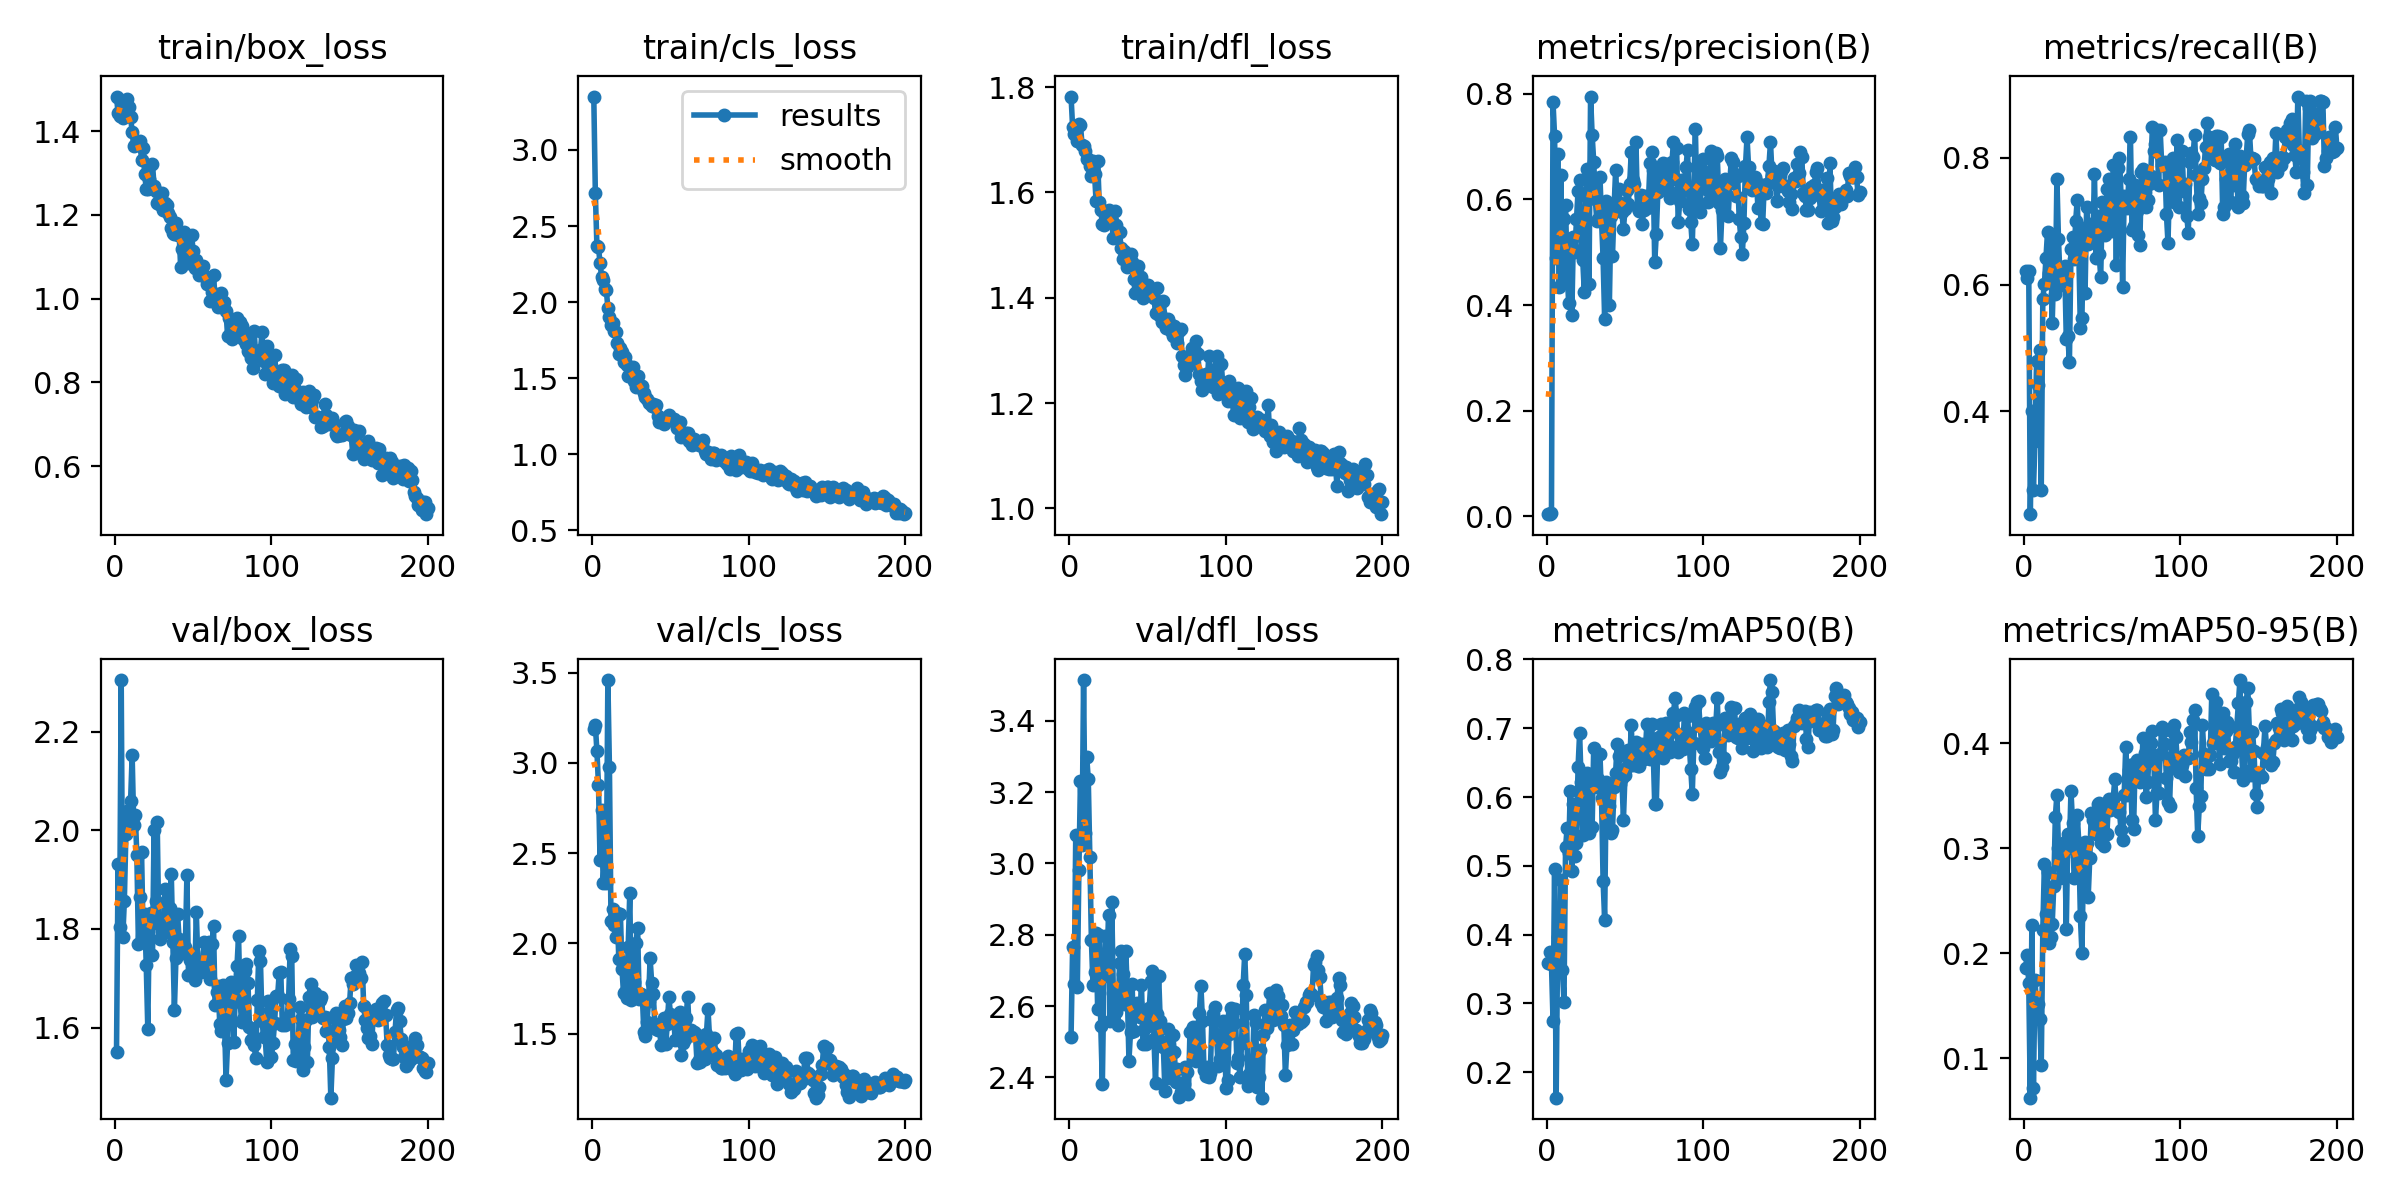

In [ ]:
from IPython.display import Image

# 학습 결과 그래프 보기
Image(filename='runs/detect/train/results.png')


In [ ]:
from ultralytics import YOLO

# 학습된 모델 로드 따로다운로드한것
model = YOLO("/content/best.pt")


In [ ]:
from ultralytics import YOLO

# 학습된 모델 불러오기
model = YOLO("/content/runs/detect/train/weights/best.pt")


In [ ]:
from google.colab import files

# 이미지 업로드
uploaded = files.upload()

# 업로드된 이미지 파일 이름 얻기
image_path = list(uploaded.keys())[0]

# 예측 실행


results = model.predict(source=image_path, save=True, conf=0.25, imgsz=640)

print("✅ 추론이 완료되었습니다. 예측 결과는 'runs/detect/predict' 폴더에 저장됩니다.")


Saving images.jpg to images (1).jpg

image 1/1 /content/images (1).jpg: 448x640 1 Baby, 1 Face, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
✅ 추론이 완료되었습니다. 예측 결과는 'runs/detect/predict' 폴더에 저장됩니다.


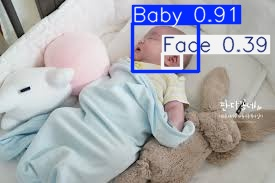

In [ ]:

from IPython.display import Image

# 추론 결과 이미지 보기
Image(filename='runs/detect/predict/' + image_path + '')


📸 bebe-3_jpg.rf.a1548efe28097c662ccbc3c493d761fb (1).jpg


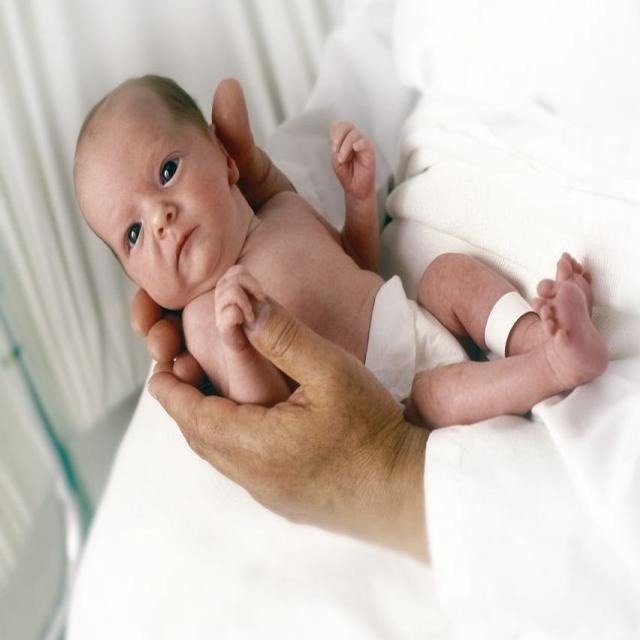

📸 1000_F_276102597_jUNp6ztEClSwSTM2n9d7FZEtQvypqYfQ_jpg.rf.b7bcece33dd3fa80b2d770d1fb843fe4 (1).jpg


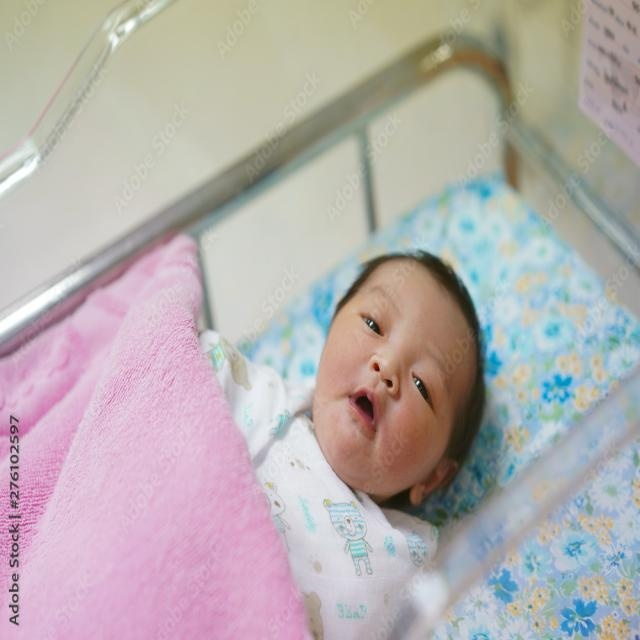

📸 bebe-3_jpg.rf.a1548efe28097c662ccbc3c493d761fb (2).jpg


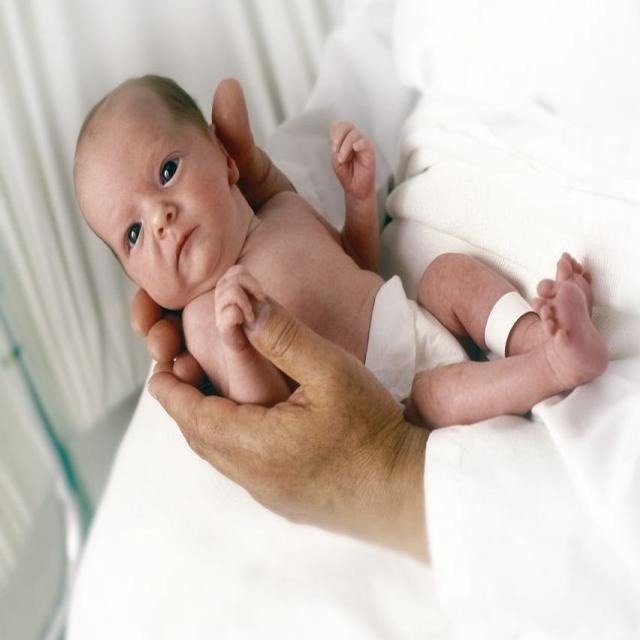

📸 011_jpeg.rf.2b012ffe951eeb1278609e470f36d0f7 (2).jpg


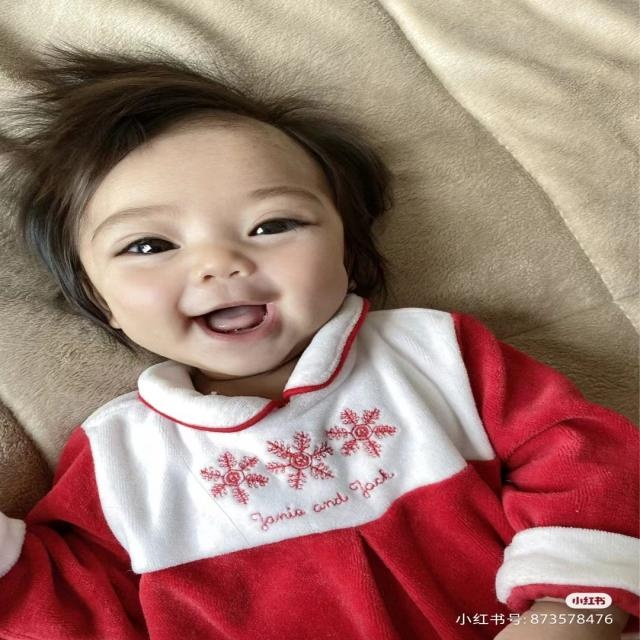

📸 05_jpeg.rf.4f5392edbc91815f1d85ec2093a3ae5e (1).jpg


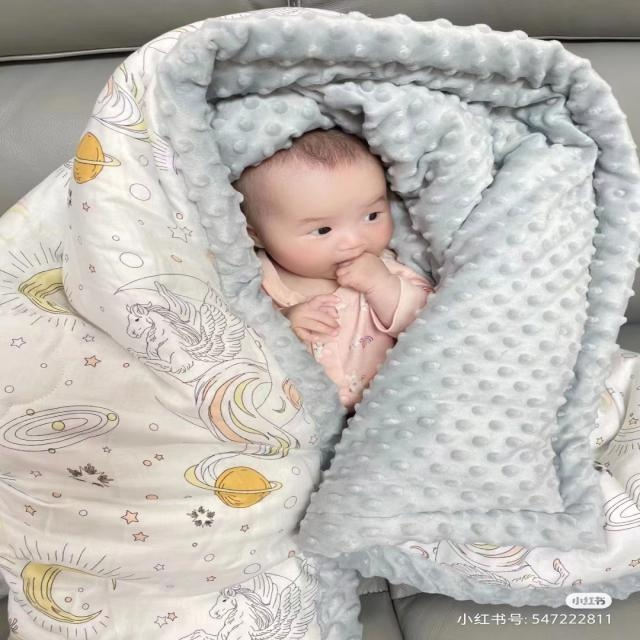

In [ ]:
from google.colab import files

# 경로: runs/detect/train/weights/best.pt 에 있다고 가정
files.download('runs/detect/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>